In [2]:
import api
import data
import datetime
import math


In [3]:
port = 9000
config = api.CloudberryConfig(f'http://localhost:{port}')
raw_api = api.RawDataApi(config)
flux_api = api.FluxDataApi(config)
stats_api = api.StatisticsDataApi(config)

In [4]:
# File upload test
uploader = api.FileUploader(config)

experiment_name = 'EMAS'
headers_keys = {
            "[WH]": "[W]",
            "[SH]": "[S]",
            "[BH]": "[B]"
}
headers_measurements = {
            "[W]": "workplace_log",
            "[S]": "summary_log",
            "[B]": "best_solution_log"
}

import_details = api.ImportDetails(headers_keys, headers_measurements)

response = uploader.upload_file('emas-20190412T120536.log', experiment_name, import_details)
print(response)

True


In [5]:
get_current_timestamp = lambda: math.trunc(datetime.datetime.utcnow().timestamp())

custom_bucket_name = None

measurement_name = 'notebook_demo_log'
computation_data = [
    api.DataPoint(
        time=get_current_timestamp(),
        fields={'python': 1, 'cloudberry': 2},
        tags={'evaluation_id': '3e29294d-bf7c-43c6-86b8-c9073de2685f'}
    )
]

r = raw_api.save_measurement_data(computation_data, measurement_name, custom_bucket_name)
r

True

In [12]:
tags = {'evaluation_id': '3e29294d-bf7c-43c6-86b8-c9073de2685f'}
fields = {'python': 1}

result = raw_api.get_measurement_data(api.LogFilters(tags, fields), measurement_name, custom_bucket_name)
result

[{'result': '_result',
  'table': 0,
  '_start': 0.0,
  '_stop': 1594969518.0347521,
  '_time': 1594552145.0,
  '_measurement': 'notebook_demo_log',
  'evaluation_id': '3e29294d-bf7c-43c6-86b8-c9073de2685f',
  'python': 1,
  'cloudberry': 2},
 {'result': '_result',
  'table': 0,
  '_start': 0.0,
  '_stop': 1594969518.0347521,
  '_time': 1594701623.0,
  '_measurement': 'notebook_demo_log',
  'evaluation_id': '3e29294d-bf7c-43c6-86b8-c9073de2685f',
  'python': 1,
  'cloudberry': 2},
 {'result': '_result',
  'table': 0,
  '_start': 0.0,
  '_stop': 1594969518.0347521,
  '_time': 1594962247.0,
  '_measurement': 'notebook_demo_log',
  'evaluation_id': '3e29294d-bf7c-43c6-86b8-c9073de2685f',
  'python': 1,
  'cloudberry': 2}]

In [15]:
df = api.as_data_frame(result)
df

,result,table,_start,_stop,_time,_measurement,evaluation_id,python,cloudberry
0,_result,0,0.0,1.594970e+09,1.594552e+09,notebook_demo_log,3e29294d-bf7c-43c6-86b8-c9073de2685f,1,2
1,_result,0,0.0,1.594970e+09,1.594702e+09,notebook_demo_log,3e29294d-bf7c-43c6-86b8-c9073de2685f,1,2
2,_result,0,0.0,1.594970e+09,1.594962e+09,notebook_demo_log,3e29294d-bf7c-43c6-86b8-c9073de2685f,1,2


In [14]:
import pandas as pd
pd.DataFrame(result)

,result,table,_start,_stop,_time,_measurement,evaluation_id,python,cloudberry
0,_result,0,0.0,1.594970e+09,1.594552e+09,notebook_demo_log,3e29294d-bf7c-43c6-86b8-c9073de2685f,1,2
1,_result,0,0.0,1.594970e+09,1.594702e+09,notebook_demo_log,3e29294d-bf7c-43c6-86b8-c9073de2685f,1,2
2,_result,0,0.0,1.594970e+09,1.594962e+09,notebook_demo_log,3e29294d-bf7c-43c6-86b8-c9073de2685f,1,2


In [8]:
# raw_api.delete_measurement_data('workplace_log')

True

In [17]:
# Example use case no. 1 - compare selected evaluations
evaluation_ids = ['5f0a35ea3c9eb043aa0ade95', '5f0ae1c0afc14f642c405029']
compared_field = 'AVERAGE_FITNESS'
measurement = 'workplace_log'

r = stats_api.compare_evaluations(evaluation_ids, compared_field, measurement)
r

[{'seriesName': '5f0a35ea3c9eb043aa0ade95',
  'data': [{'result': '_result',
    'table': 0,
    '_start': 0.0,
    '_stop': 1594969866.451168,
    '_time': 5.013091548,
    '_measurement': 'workplace_log',
    'evaluationId': '5f0a35ea3c9eb043aa0ade95',
    'ENERGY_SUM': 2459.5030988546378,
    'POPULATION_SIZE': 102.0,
    'WORKPLACE_ID': 0.0,
    'STEP_NUMBER': 4177.0,
    'TIME': 5013091548.0,
    'AVERAGE_FITNESS': 4.5770462784680515,
    '[WH]': '[W]'},
   {'result': '_result',
    'table': 0,
    '_start': 0.0,
    '_stop': 1594969866.451168,
    '_time': 10.002131168,
    '_measurement': 'workplace_log',
    'evaluationId': '5f0a35ea3c9eb043aa0ade95',
    'ENERGY_SUM': 2449.4325282454074,
    'POPULATION_SIZE': 101.0,
    'WORKPLACE_ID': 0.0,
    'STEP_NUMBER': 10092.0,
    'TIME': 10002131168.0,
    'AVERAGE_FITNESS': 4.574656756011093,
    '[WH]': '[W]'},
   {'result': '_result',
    'table': 0,
    '_start': 0.0,
    '_stop': 1594969866.451168,
    '_time': 15.014142755,
   

In [49]:
# evaluation_ids = ['5f0a35ea3c9eb043aa0ade95', '5f0ae1c0afc14f642c405029', '5f0d598e17b37d54c56171c7']
# compared_field = 'BEST_SOLUTION_SO_FAR'
# measurement = 'summary_log'

# r = stats_api.compare_evaluations(evaluation_ids, compared_field, measurement)
# r

In [30]:
data_series = data.DataHelpers.get_data_series(r)

In [31]:
series_one = next(s for s in data_series if s.series_name == evaluation_ids[0])
series_one_df = series_one.get_data_frame()

series_one_df

,result,table,_start,_stop,_time,_measurement,evaluationId,FITNESS_EVALUATIONS,TIME,[SH],BEST_SOLUTION_SO_FAR,series_name
0,_result,0,0.0,1.594970e+09,5.013092,summary_log,5f0a35ea3c9eb043aa0ade95,947275.0,5.013092e+09,[S],6.624026,5f0a35ea3c9eb043aa0ade95
1,_result,0,0.0,1.594970e+09,10.002131,summary_log,5f0a35ea3c9eb043aa0ade95,2214475.0,1.000213e+10,[S],6.624026,5f0a35ea3c9eb043aa0ade95
2,_result,0,0.0,1.594970e+09,15.014143,summary_log,5f0a35ea3c9eb043aa0ade95,3372875.0,1.501414e+10,[S],6.624026,5f0a35ea3c9eb043aa0ade95
3,_result,0,0.0,1.594970e+09,20.009512,summary_log,5f0a35ea3c9eb043aa0ade95,4416075.0,2.000951e+10,[S],6.624026,5f0a35ea3c9eb043aa0ade95
4,_result,0,0.0,1.594970e+09,25.007677,summary_log,5f0a35ea3c9eb043aa0ade95,5456075.0,2.500768e+10,[S],6.624026,5f0a35ea3c9eb043aa0ade95
...,...,...,...,...,...,...,...,...,...,...,...,...
954,_result,0,0.0,1.594970e+09,4775.003626,summary_log,5f0a35ea3c9eb043aa0ade95,992944075.0,4.775004e+12,[S],6.764589,5f0a35ea3c9eb043aa0ade95
955,_result,0,0.0,1.594970e+09,4780.002268,summary_log,5f0a35ea3c9eb043aa0ade95,993993675.0,4.780002e+12,[S],6.764589,5f0a35ea3c9eb043aa0ade95
956,_result,0,0.0,1.594970e+09,4785.003570,summary_log,5f0a35ea3c9eb043aa0ade95,995030475.0,4.785004e+12,[S],6.764589,5f0a35ea3c9eb043aa0ade95
957,_result,0,0.0,1.594970e+09,4790.003503,summary_log,5f0a35ea3c9eb043aa0ade95,996070475.0,4.790004e+12,[S],6.764589,5f0a35ea3c9eb043aa0ade95


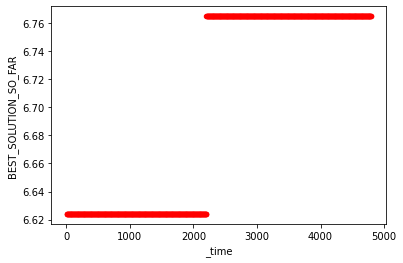

In [32]:
series_one.get_plot('_time', compared_field)

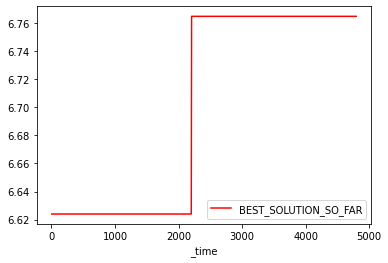

In [33]:
series_one.get_plot('_time', compared_field, kind='line')

In [34]:
data_series_df = [s.get_data_frame() for s in data_series]

merged_full_df = data.DataHelpers.merge_data_frames(data_series_df)
merged_df = merged_full_df[['_time', 'series_name', compared_field]]
merged_df

,_time,series_name,BEST_SOLUTION_SO_FAR
0,5.013092,5f0a35ea3c9eb043aa0ade95,6.624026
1,10.002131,5f0a35ea3c9eb043aa0ade95,6.624026
2,15.014143,5f0a35ea3c9eb043aa0ade95,6.624026
3,20.009512,5f0a35ea3c9eb043aa0ade95,6.624026
4,25.007677,5f0a35ea3c9eb043aa0ade95,6.624026
...,...,...,...
714,4760.008000,mean,6.764589
715,4766.670000,mean,6.764589
716,4773.332000,mean,6.764589
717,4779.994000,mean,6.764589


In [35]:
mean_std_df = merged_full_df[merged_full_df['series_name']=='mean'][['_time', compared_field, f'{compared_field}_STD']]
mean_std_df

,_time,BEST_SOLUTION_SO_FAR,BEST_SOLUTION_SO_FAR_STD
0,3.331,6.624026,0.000000
1,9.993,6.624026,0.000000
2,16.655,6.624026,0.000000
3,23.317,6.624026,0.000000
4,29.979,6.624026,0.000000
...,...,...,...
714,4760.008,6.764589,0.000000
715,4766.670,6.764589,0.000000
716,4773.332,6.764589,0.000000
717,4779.994,6.764589,0.000000


<ErrorbarContainer object of 3 artists>

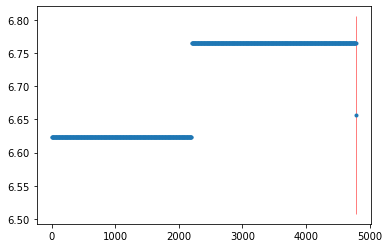

In [36]:
import matplotlib.pyplot as plt
plt.errorbar(mean_std_df['_time'], \
             mean_std_df[compared_field], \
             mean_std_df[compared_field + '_STD'],
             ecolor='red',
             elinewidth=.5,
             linestyle='None', marker='.')


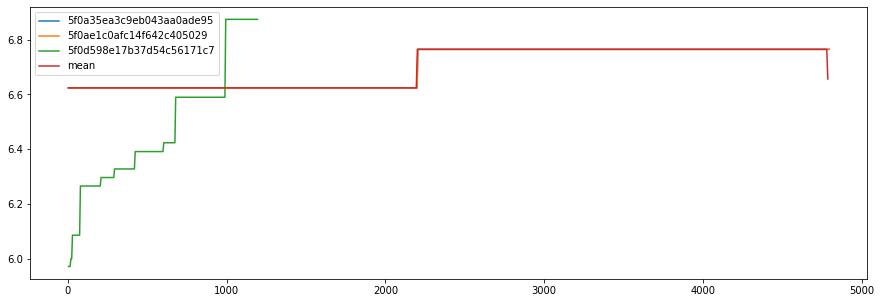

In [37]:
data.DataHelpers.comparison_plot([merged_df], compared_field, '_time')

In [39]:
compared_field = 'AVERAGE_FITNESS'
measurement = 'workplace_log'

In [50]:
# Compare all evaluations for configuration
configuration_id = '5f0ae1c0afc14f642c405028'

r = stats_api.compare_evaluations_for_configuration(configuration_id, compared_field, measurement)
ds = data.DataHelpers.get_data_series(r)
data.DataHelpers.comparison_plot([s.get_data_frame() for s in ds], compared_field)

ConnectionError: HTTPConnectionPool(host='localhost', port=9000): Max retries exceeded with url: /statistics/compare/evaluations/all?comparedField=BEST_SOLUTION_SO_FAR&measurementName=workplace_log&configurationIdHex=5f0ae1c0afc14f642c405028 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f1daf923eb8>: Failed to establish a new connection: [Errno 111] Connection refused',))

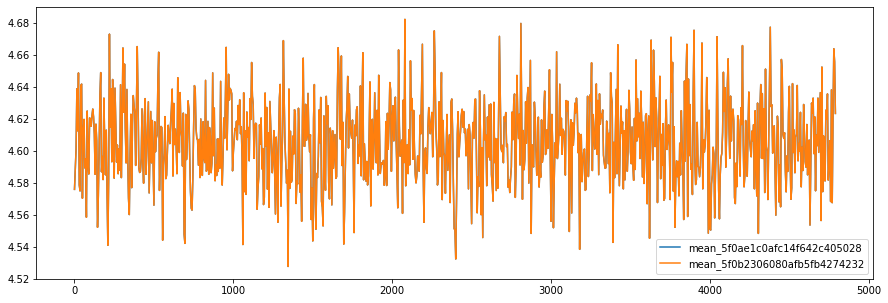

In [42]:
# Compare selected configurations
configuration_ids = ['5f0ae1c0afc14f642c405028', '5f0b2306080afb5fb4274232']

r = stats_api.compare_configurations(configuration_ids, compared_field, measurement)
ds = data.DataHelpers.get_data_series(r)
data.DataHelpers.comparison_plot([s.get_data_frame() for s in ds], compared_field)

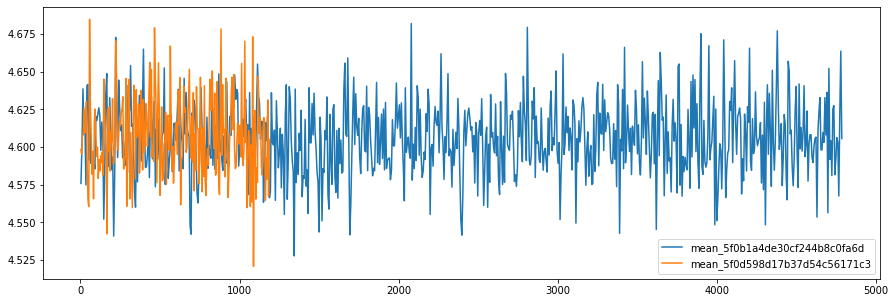

In [43]:
# Compare all configurations for experiment
experiment_name = 'EMAS'
r = stats_api.compare_configurations_for_experiment(experiment_name, compared_field, measurement)
ds = data.DataHelpers.get_data_series(r)
data.DataHelpers.comparison_plot([s.get_data_frame() for s in ds], compared_field)

In [44]:
# Upload more files
emas_files = [
    'emas-20190411T234810.log',
    'emas-20190412T000813.log',
    'emas-20190411T232808.log'
]

for ef in emas_files:
    response = uploader.upload_file(ef, experiment_name, import_details)
    print(response)

True
True
True


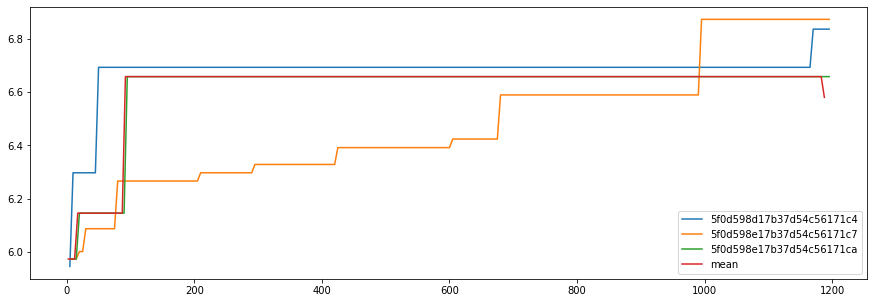

In [48]:
# Compare the above
emas_evals = [
    '5f0d598e17b37d54c56171ca',
    '5f0d598e17b37d54c56171c7',
    '5f0d598d17b37d54c56171c4'
]
compared_field = 'BEST_SOLUTION_SO_FAR'

r = stats_api.compare_evaluations(emas_evals, compared_field, measurement)
r = stats_api.compare_evaluations(emas_evals, compared_field, 'summary_log')
ds = data.DataHelpers.get_data_series(r)
data.DataHelpers.comparison_plot([s.get_data_frame() for s in ds], compared_field)

In [ ]:
# Po stronie np. pythona zrobić coś co wgrywa cały folder / zip 
# Use case: poproszę N serii które mają największy parametr X (np. fitness) na koncu serii evaluation
# Można wygenerować dokumentację jakimś toolem - swagger?

# 3.1 - streszczenie
# 3.2 - taka zakładka features
# 3.3 - realizacja
# 4 - pracownia
# 5 - showcase

# Dogadać z klientem więcej niż 1 scenariusz do przodu, bardziej całościowy plan